In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import sklearn.metrics       as Metrics


In [172]:
customer = pd.read_csv('Data/olist_customers_dataset.csv', delimiter=',') 
geolocation=pd.read_csv('Data/olist_geolocation_dataset.csv', delimiter=',') 
order_items=pd.read_csv('Data/olist_order_items_dataset.csv', delimiter=',') 
order_payments=pd.read_csv('Data/olist_order_payments_dataset.csv', delimiter=',') 
order_reviews=pd.read_csv('Data/olist_order_reviews_dataset.csv', delimiter=',') 
orders=pd.read_csv('Data/olist_orders_dataset.csv', delimiter=',') 
products=pd.read_csv('Data/olist_products_dataset.csv', delimiter=',') 
sellers=pd.read_csv('Data/olist_sellers_dataset.csv', delimiter=',') 
category=pd.read_csv('Data/product_category_name_translation.csv', delimiter=',') 

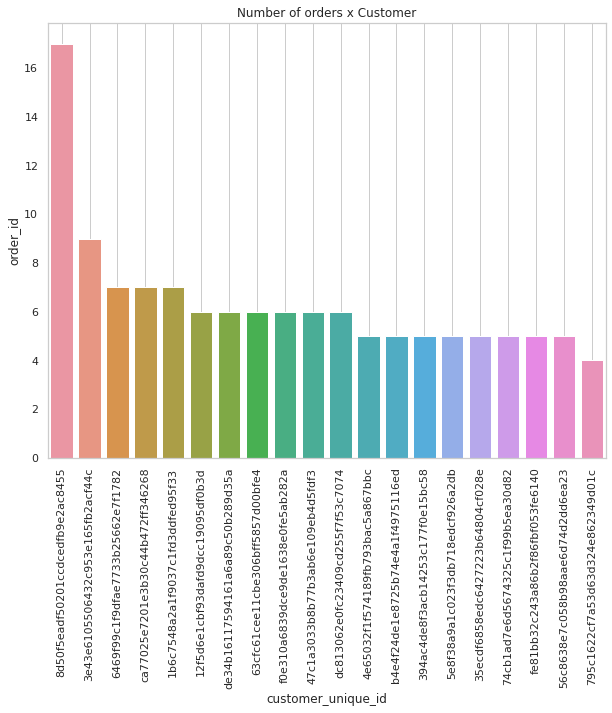

In [213]:
costumer_orders=pd.merge(customer, orders)
aux=costumer_orders.groupby(['customer_unique_id']).agg({'order_id':'count'}).reset_index()
aux=aux.sort_values(by='order_id',ascending=False).head(20)
plt.figure(figsize=(10, 8))
ax=sns.barplot(x='customer_unique_id',y='order_id',data=aux);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title('Number of orders x Customer')
ax.grid()

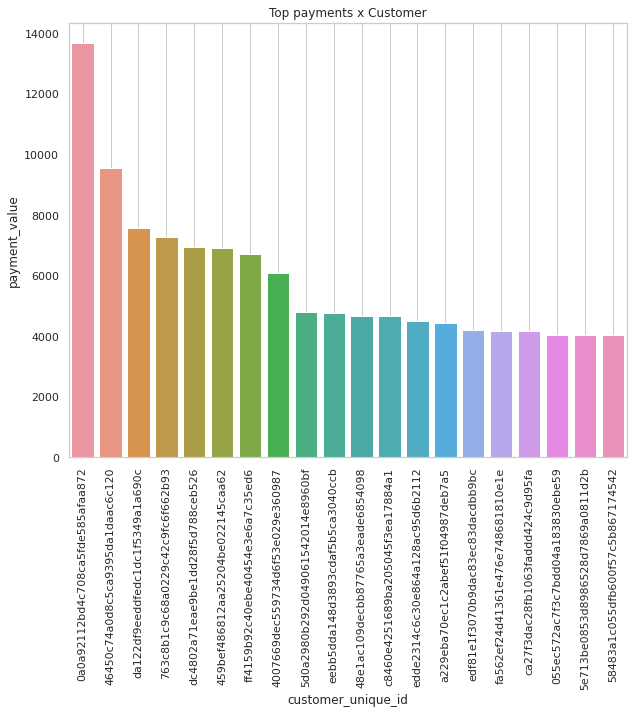

In [212]:
costumer_payments=pd.merge(costumer_orders, order_payments)
aux=costumer_payments.groupby(['customer_unique_id']).agg({'payment_value':'sum'}).reset_index()
aux=aux.sort_values(by='payment_value',ascending=False).head(20)
plt.figure(figsize=(10, 8))
ax=sns.barplot(x='customer_unique_id',y='payment_value',data=aux);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title('Top payments x Customer')
ax.grid()

<AxesSubplot:xlabel='price', ylabel='product_category_name'>

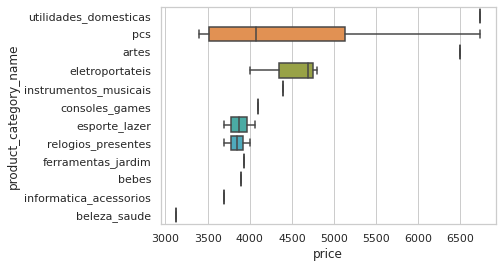

In [210]:
#merge products & order_items
order_product=pd.merge(products, order_items)
top_products= order_product.sort_values(['price'],ascending=False).head(20)
sns.boxplot(y=top_products['product_category_name'], x=top_products["price"])


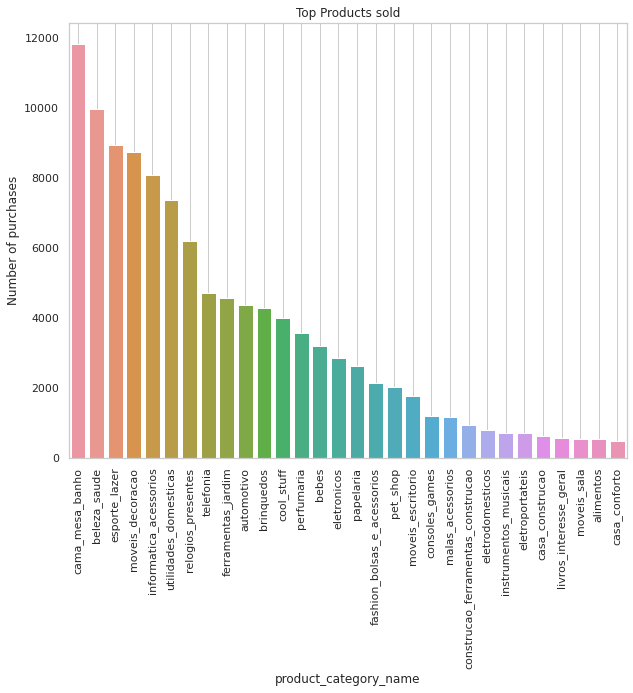

In [225]:
client_product=pd.merge(costumer_payments, order_product)
aux=client_product.groupby('product_category_name').size().to_frame().rename(columns={0:'Number of purchases'}).reset_index()
aux=aux.sort_values(by='Number of purchases',ascending=False).head(30)
plt.figure(figsize=(10, 8))
ax=sns.barplot(x='product_category_name',y='Number of purchases',data=aux);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title('Top Products sold')
ax.grid()

<AxesSubplot:xlabel='price', ylabel='product_category_name'>

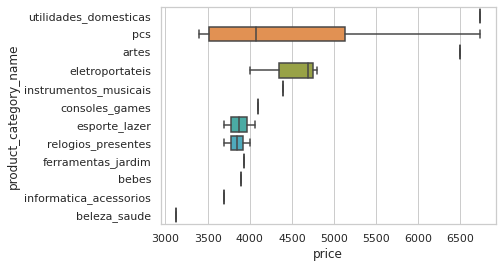

In [223]:
aux=costumer_payments.groupby(['product_category_name']).agg({'payment_value':'sum'}).reset_index()
aux=client_product.groupby('product_category_name').size().to_frame().rename(columns={0:'Number of purchases'}).reset_index()
top_products= client_product.sort_values(['price'],ascending=False).head(20)
sns.boxplot(y=top_products['product_category_name'], x=top_products["price"])

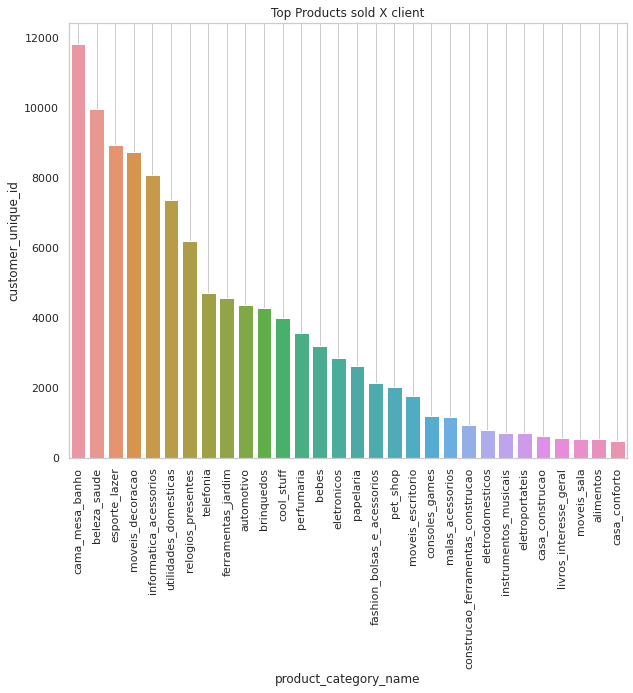

In [236]:
# aux=client_product.groupby(['product_category_name']).agg({'customer_unique_id':'count'}).reset_index()
# aux=aux.sort_values(by='customer_unique_id',ascending=False).head(30)
# # sns.boxplot(y=aux['product_category_name'], x=aux["customer_unique_id"])
# plt.figure(figsize=(10, 8))
# ax=sns.barplot(x='product_category_name',y='customer_unique_id',data=aux);
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
# ax.set_title('Top Products sold X client')
# ax.grid()

In [4]:
tam=customer['customer_unique_id'].size
print("Customer")
print("Customer size:", tam)
print("Columns: ", customer.columns)
print("Customer State: ",customer.customer_state.unique())
#customer.describe()

Customer
Customer size: 99441
Columns:  Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
Customer State:  ['SP' 'SC' 'MG' 'PR' 'RJ' 'RS' 'PA' 'GO' 'ES' 'BA' 'MA' 'MS' 'CE' 'DF'
 'RN' 'PE' 'MT' 'AM' 'AP' 'AL' 'RO' 'PB' 'TO' 'PI' 'AC' 'SE' 'RR']


SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64


<AxesSubplot:xlabel='customer_state', ylabel='count'>

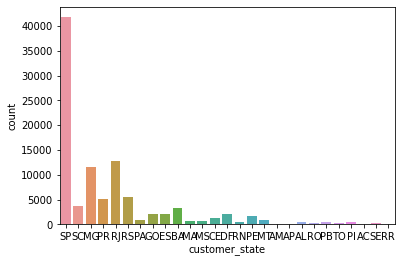

In [5]:
print(customer['customer_state'].value_counts())
sns.countplot(x= 'customer_state', data=customer)

In [6]:
customer.isna().any()

customer_id                 False
customer_unique_id          False
customer_zip_code_prefix    False
customer_city               False
customer_state              False
dtype: bool

In [7]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [8]:
print("Geolocation")
print("geolocation size:", geolocation.size)
print("Columns: ", geolocation.columns)

#geolocation.describe()

Geolocation
geolocation size: 5000815
Columns:  Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')


SP    404268
MG    126336
RJ    121169
RS     61851
PR     57859
SC     38328
BA     36045
GO     20139
ES     16748
PE     16432
DF     12986
MT     12031
CE     11674
PA     10853
MS     10431
MA      7853
PB      5538
RN      5041
PI      4549
AL      4183
TO      3576
SE      3563
RO      3478
AM      2432
AC      1301
AP       853
RR       646
Name: geolocation_state, dtype: int64


<AxesSubplot:xlabel='geolocation_state', ylabel='count'>

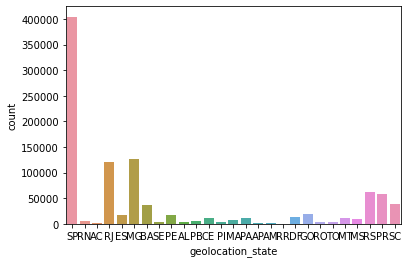

In [9]:
print(geolocation['geolocation_state'].value_counts())
sns.countplot(x= 'geolocation_state', data=geolocation)

In [10]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [11]:
print("Orders: ")
print("Columns: ", orders.columns)
print("Orders Size: ", orders.order_id.size)
orders.describe()

Orders: 
Columns:  Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
Orders Size:  99441


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,0f6b7fd8b1ca2b342b4629b5c8a4435b,5478040f977215fe64805033d2e8612a,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2016-10-27 17:32:07,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [12]:
orders.isna().any()

order_id                         False
customer_id                      False
order_status                     False
order_purchase_timestamp         False
order_approved_at                 True
order_delivered_carrier_date      True
order_delivered_customer_date     True
order_estimated_delivery_date    False
dtype: bool

In [13]:
orders['order_purchase']=pd.to_datetime(orders['order_purchase_timestamp'])

In [14]:
orders.set_index('order_purchase',inplace=True)

<AxesSubplot:xlabel='order_purchase'>

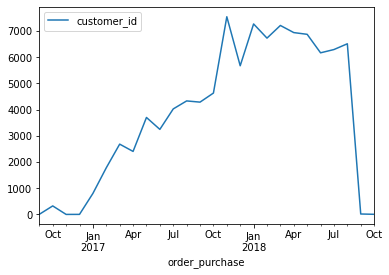

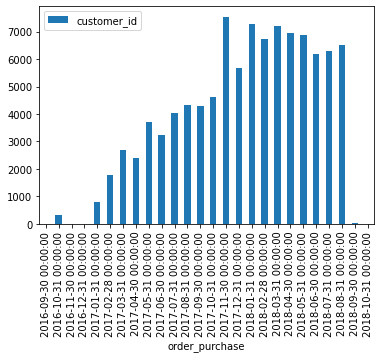

In [15]:
orders.groupby(pd.Grouper(freq='M')).agg({'customer_id':'count'}).plot()
orders.groupby(pd.Grouper(freq='M')).agg({'customer_id':'count'}).plot(kind='bar')

In [16]:
orders['HOUR']=pd.to_datetime(orders['order_purchase_timestamp']).dt.hour

<AxesSubplot:xlabel='HOUR'>

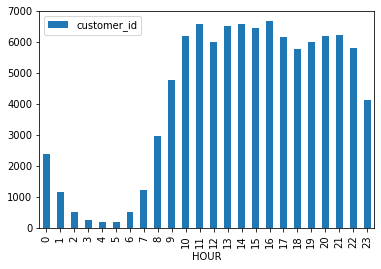

In [17]:
orders.groupby(orders['HOUR']).agg({'customer_id':'count'}).plot(kind='bar') 

In [18]:
orders['WEEK_DAY']=pd.to_datetime(orders['order_purchase_timestamp']).dt.weekday

<AxesSubplot:xlabel='WEEK_DAY'>

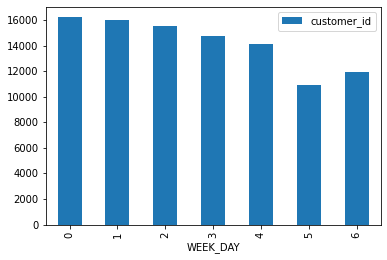

In [19]:
orders.groupby(orders['WEEK_DAY']).agg({'customer_id':'count'}).plot(kind='bar') 

In [20]:
orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64


<AxesSubplot:xlabel='order_status'>

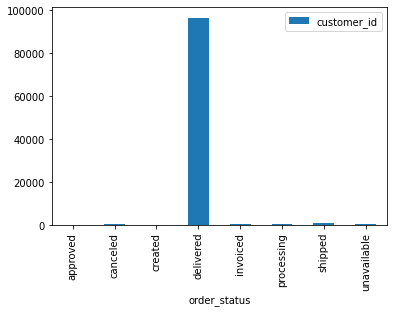

In [21]:
print(orders['order_status'].value_counts())
orders.groupby(orders['order_status']).agg({'customer_id':'count'}).plot(kind='bar') 

In [22]:
efective_orders=orders[(orders.order_status!= 'canceled') & (orders.order_status!= 'unavailable')]

In [23]:
print(efective_orders['order_status'].value_counts())

delivered     96478
shipped        1107
invoiced        314
processing      301
created           5
approved          2
Name: order_status, dtype: int64


In [24]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [25]:
print("Payments: ")
print("Columns: ", order_payments.columns)
print("Payments Size: ", order_payments.order_id.size)
order_payments.describe()

Payments: 
Columns:  Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')
Payments Size:  103886


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


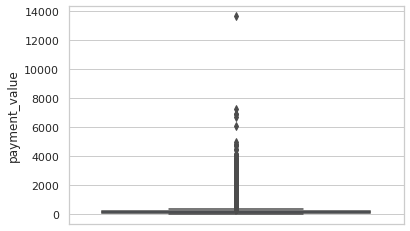

In [26]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(y=order_payments["payment_value"])

#sns.boxplot(x="day", y="total_bill", data=order_payments)

In [27]:
efective_orders.reset_index(drop=True)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,HOUR,WEEK_DAY
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,10,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,20,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,8,2
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,19,5
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,21,1
...,...,...,...,...,...,...,...,...,...,...
98202,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,9,3
98203,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,12,1
98204,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,14,6
98205,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,21,0


In [28]:
efective_orders.set_index('order_id')

,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,HOUR,WEEK_DAY
order_id,,,,,,,,,
e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,10,0
53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,20,1
47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,8,2
949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,19,5
ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,21,1
...,...,...,...,...,...,...,...,...,...
9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,9,3
63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,12,1
83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,14,6


In [29]:
order_payments.set_index('order_id')

,payment_sequential,payment_type,payment_installments,payment_value
order_id,,,,
b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...
0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77


In [30]:
#payment_orders= pd.concat([order_payments,efective_orders], axis=1)
payment_orders=pd.merge(order_payments, efective_orders)

In [31]:
payment_orders.sort_values(['payment_value'],ascending=False).head(20)


,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,HOUR,WEEK_DAY
53770,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,1617b1357756262bfa56ab541c47bc16,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00,15,4
36295,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,ec5b2ba62e574342386871631fafd3fc,delivered,2018-07-15 14:49:44,2018-07-17 04:31:36,2018-07-20 13:09:00,2018-07-26 22:03:06,2018-08-02 00:00:00,14,6
43313,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,c6e2731c5b391845f6800c97401a43a9,delivered,2017-02-12 20:37:36,2017-02-12 20:45:12,2017-02-16 09:23:13,2017-03-03 14:23:18,2017-03-09 00:00:00,20,6
51316,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,f48d464a0baaea338cb25f816991ab1f,delivered,2018-07-25 18:10:17,2018-07-27 04:05:13,2018-08-03 14:42:00,2018-08-15 14:57:50,2018-08-10 00:00:00,18,2
85592,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,3fd6777bbce08a352fddd04e4a7cc8f6,delivered,2017-05-24 18:14:34,2017-05-26 02:45:17,2017-05-26 11:20:47,2017-06-05 17:09:48,2017-06-28 00:00:00,18,2
63695,2cc9089445046817a7539d90805e6e5a,1,boleto,1,6081.54,05455dfa7cd02f13d132aa7a6a9729c6,delivered,2017-11-24 11:03:35,2017-11-28 12:55:46,2017-12-06 11:52:14,2017-12-13 12:16:02,2017-12-22 00:00:00,11,4
45103,a96610ab360d42a2e5335a3998b4718a,1,credit_card,10,4950.34,df55c14d1476a9a3467f131269c2477f,delivered,2017-04-01 15:58:40,2017-04-03 13:25:18,2017-04-11 15:10:34,2017-04-17 11:04:45,2017-05-02 00:00:00,15,5
7312,199af31afc78c699f0dbf71fb178d4d4,1,credit_card,8,4764.34,24bbf5fd2f2e1b359ee7de94defc4a15,delivered,2017-04-18 18:50:13,2017-04-19 15:50:15,2017-04-25 13:39:59,2017-05-07 10:42:39,2017-05-15 00:00:00,18,1
68632,8dbc85d1447242f3b127dda390d56e19,1,credit_card,8,4681.78,3d979689f636322c62418b6346b1c6d2,delivered,2018-06-22 12:23:19,2018-06-22 12:36:36,2018-06-22 13:00:00,2018-07-06 01:08:30,2018-07-17 00:00:00,12,4
70140,426a9742b533fc6fed17d1fd6d143d7e,1,credit_card,10,4513.32,1afc82cd60e303ef09b4ef9837c9505c,delivered,2018-08-03 21:10:16,2018-08-06 14:24:28,2018-08-06 15:01:00,2018-08-08 22:51:57,2018-08-20 00:00:00,21,4


In [32]:
payment_orders.sort_values(['payment_value'],ascending=False).tail(20)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,HOUR,WEEK_DAY
35142,c96a303a722b89bc14a23b7a2f0e68e4,1,credit_card,1,0.10,1d8474c2d38785d7b11cb262d17eeee1,delivered,2018-06-15 18:15:24,2018-06-15 18:41:48,2018-06-20 15:03:00,2018-06-22 00:36:38,2018-07-03 00:00:00,18,4
18317,2122719f6fc72fba16b0b3001d539a7e,1,credit_card,1,0.09,9b827375ba57d2e979329d7a5c92685d,delivered,2018-01-16 11:51:45,2018-01-16 12:16:48,2018-01-17 16:49:12,2018-02-06 15:32:02,2018-02-06 00:00:00,11,1
17204,580e9410cdbeb1ec66a48d3d0454dd17,1,credit_card,1,0.08,e64813a1e1c56c5f628d71d62b69fe7c,delivered,2017-11-24 02:08:40,2017-11-24 02:29:27,2017-11-28 15:48:46,2017-12-21 20:05:34,2018-01-05 00:00:00,2,4
93551,874904b7cdcd377a298d82e303930223,2,voucher,1,0.08,14425ff5b814c955a524faf453a68bfd,delivered,2017-05-01 20:40:57,2017-05-01 20:50:14,2017-05-02 11:27:39,2017-05-11 09:55:42,2017-06-30 00:00:00,20,0
25245,2a4cf847d8e23123b4421ef7f7dc3d9f,1,credit_card,1,0.05,0d10f3ce86eae5da478b5475eb2f03bd,delivered,2017-08-31 16:38:29,2017-08-31 16:50:08,2017-09-05 21:42:43,2017-09-11 18:28:09,2017-09-29 00:00:00,16,3
19736,d8c4293616878e2f015351d8f1445880,1,credit_card,1,0.05,30dc4f27dcf5d2ebf9a48f7799229ad3,delivered,2018-06-11 13:51:38,2018-06-11 16:31:41,2018-06-12 15:44:00,2018-06-15 19:56:54,2018-07-05 00:00:00,13,0
12642,4884bd0f5624b0b791920965686cf6ff,1,credit_card,1,0.03,9ea3c1c432aa8be6b9c04d7fea7f66ed,delivered,2018-05-22 17:58:24,2018-05-23 12:00:07,2018-05-23 15:26:00,2018-06-07 22:48:22,2018-06-12 00:00:00,17,1
22698,bb1d699eccd1fe0e0b22aea230eab2d0,1,credit_card,1,0.03,31ad6b689eef45fc804eae97be42ca4b,delivered,2017-11-29 20:03:11,2017-11-29 20:10:00,2017-11-30 22:42:02,2017-12-09 18:04:55,2017-12-27 00:00:00,20,2
38254,25b5b0ea53b7d5a2d5712a0d9d0b3649,1,credit_card,1,0.01,dd171c5cd21429f0a17605d2428d2bf0,delivered,2017-08-31 00:47:54,2017-08-31 01:06:16,2017-09-05 21:10:32,2017-09-06 19:17:03,2017-09-13 00:00:00,0,3
19479,0218c7a4fb8d5b1bd22c82b783b8359c,1,credit_card,1,0.01,430ec51e3c42def76f0d79a8edb21784,delivered,2017-10-13 12:58:35,2017-10-13 13:09:23,2017-10-13 19:33:52,2017-10-23 12:12:29,2017-10-31 00:00:00,12,4


<AxesSubplot:xlabel='WEEK_DAY', ylabel='payment_value'>

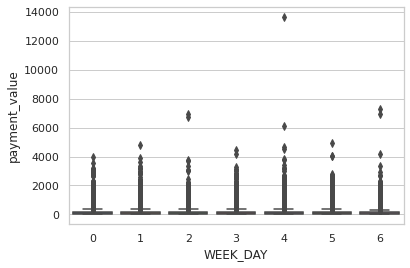

In [33]:
sns.boxplot(x=payment_orders['WEEK_DAY'], y=payment_orders["payment_value"])

In [34]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [35]:
print("Products: ")
print("Columns: ", products.columns)
print("Products Size: ", products.product_id.size)
products.describe()

Products: 
Columns:  Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')
Products Size:  32951


,product_name_lenght,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [36]:
products.groupby('product_category_name').size().sort_values(ascending=False).head(20)

product_category_name
cama_mesa_banho                      3029
esporte_lazer                        2867
moveis_decoracao                     2657
beleza_saude                         2444
utilidades_domesticas                2335
automotivo                           1900
informatica_acessorios               1639
brinquedos                           1411
relogios_presentes                   1329
telefonia                            1134
bebes                                 919
perfumaria                            868
fashion_bolsas_e_acessorios           849
papelaria                             849
cool_stuff                            789
ferramentas_jardim                    753
pet_shop                              719
eletronicos                           517
construcao_ferramentas_construcao     400
eletrodomesticos                      370
dtype: int64

<AxesSubplot:xlabel='price', ylabel='product_category_name'>

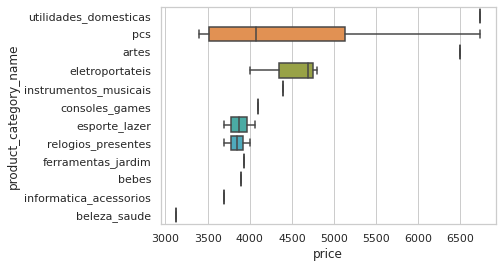

In [37]:
#merge products & order_items
order_product=pd.merge(products, order_items)
top_products= order_product.sort_values(['price'],ascending=False).head(20)
sns.boxplot(y=top_products['product_category_name'], x=top_products["price"])

In [38]:
# order_product_payments=pd.merge(order_product, order_payments)

# order_product_payments.
# # 
# order_product_payments.sort_values(['payment_value'],ascending=False)

SyntaxError: invalid syntax (<ipython-input-38-12e457a080cf>, line 3)

In [39]:
top_products=products['product_category_name'].value_counts().head(20)
print(top_products)


cama_mesa_banho                      3029
esporte_lazer                        2867
moveis_decoracao                     2657
beleza_saude                         2444
utilidades_domesticas                2335
automotivo                           1900
informatica_acessorios               1639
brinquedos                           1411
relogios_presentes                   1329
telefonia                            1134
bebes                                 919
perfumaria                            868
papelaria                             849
fashion_bolsas_e_acessorios           849
cool_stuff                            789
ferramentas_jardim                    753
pet_shop                              719
eletronicos                           517
construcao_ferramentas_construcao     400
eletrodomesticos                      370
Name: product_category_name, dtype: int64


In [ ]:
'''Client trends: 
tendencias por cliente (relacion entre producto, tipo producto) '''

In [41]:
print("Order Items")
print("Order Items size:", order_items.size)
print("Order Items Columns: ", order_items.columns)

order_items.describe()

Order Items
Order Items size: 788550
Order Items Columns:  Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [40]:
client_product=pd.merge(customer, payment_orders)

In [42]:
print("client_product Items")
print("client_product size:", client_product.size)
print("client_product Columns: ", client_product.columns)

client_product Items
client_product size: 1846314
client_product Columns:  Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'HOUR', 'WEEK_DAY'],
      dtype='object')


In [43]:
client_payments=pd.merge(customer, client_product)

In [44]:
print("client_payments")
print("client_product size:", client_payments.size)
print("client_product Columns: ", client_payments.columns)

client_payments
client_product size: 1846314
client_product Columns:  Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'HOUR', 'WEEK_DAY'],
      dtype='object')


In [70]:
client_payments.sort_values(['payment_value'],ascending=False).head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,HOUR,WEEK_DAY
6412,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00,15,4
101536,ec5b2ba62e574342386871631fafd3fc,763c8b1c9c68a0229c42c9fc6f662b93,29102,vila velha,ES,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,delivered,2018-07-15 14:49:44,2018-07-17 04:31:36,2018-07-20 13:09:00,2018-07-26 22:03:06,2018-08-02 00:00:00,14,6
13889,c6e2731c5b391845f6800c97401a43a9,dc4802a71eae9be1dd28f5d788ceb526,79042,campo grande,MS,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,delivered,2017-02-12 20:37:36,2017-02-12 20:45:12,2017-02-16 09:23:13,2017-03-03 14:23:18,2017-03-09 00:00:00,20,6
21864,f48d464a0baaea338cb25f816991ab1f,459bef486812aa25204be022145caa62,29066,vitoria,ES,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,delivered,2018-07-25 18:10:17,2018-07-27 04:05:13,2018-08-03 14:42:00,2018-08-15 14:57:50,2018-08-10 00:00:00,18,2
4042,3fd6777bbce08a352fddd04e4a7cc8f6,ff4159b92c40ebe40454e3e6a7c35ed6,17506,marilia,SP,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,delivered,2017-05-24 18:14:34,2017-05-26 02:45:17,2017-05-26 11:20:47,2017-06-05 17:09:48,2017-06-28 00:00:00,18,2


NameError: name 'order_purchase_timestamp' is not defined

In [72]:
client_payments.set_index('order_purchase_timestamp',inplace=True)

In [120]:
client_payments

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,HOUR,WEEK_DAY
order_purchase_timestamp,,,,,,,,,,,,,,,,,
2017-05-16 15:05:35,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,1,credit_card,2,146.87,delivered,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,15,1
2018-01-12 20:48:24,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,1,credit_card,8,335.48,delivered,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,20,4
2018-05-19 16:07:45,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,1,credit_card,7,157.73,delivered,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,16,5
2018-03-13 16:06:38,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,1,credit_card,1,173.30,delivered,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,16,1
2018-07-29 09:51:30,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,1,credit_card,8,252.25,delivered,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-07 15:48:17,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,1,credit_card,6,88.78,delivered,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,15,5
2018-04-04 08:20:22,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,1,credit_card,3,129.06,delivered,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,8,2
2018-04-08 20:11:50,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,1,credit_card,5,56.04,delivered,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,20,6


In [108]:
# client_payments.groupby(['customer_id'])['payment_value']
 client_pay_group= client_payments.groupby('customer_id').agg({'payment_value':['sum']}).reset_index().rename(columns={1:'Suma'})
# client_pay_group= client_payments.groupby('customer_id').agg('payment_value':['sum']})

In [118]:
 client_pay_group.values[0]

array(['00012a2ce6f8dcda20d059ce98491703', 114.74], dtype=object)

In [110]:
 client_pay_group.columns

MultiIndex([(  'customer_id',    ''),
            ('payment_value', 'sum')],
           )

In [111]:
client_pay_group.sort_values(by='sum',ascending=False)

TypeError: list indices must be integers or slices, not str

In [95]:
client_pay_group

,payment_value
,sum
customer_id,
00012a2ce6f8dcda20d059ce98491703,114.74
000161a058600d5901f007fab4c27140,67.41
0001fd6190edaaf884bcaf3d49edf079,195.42
0002414f95344307404f0ace7a26f1d5,179.35
000379cdec625522490c315e70c7a9fb,107.01
...,...
fffcb937e9dd47a13f05ecb8290f4d3e,91.91
fffecc9f79fd8c764f843e9951b11341,81.36


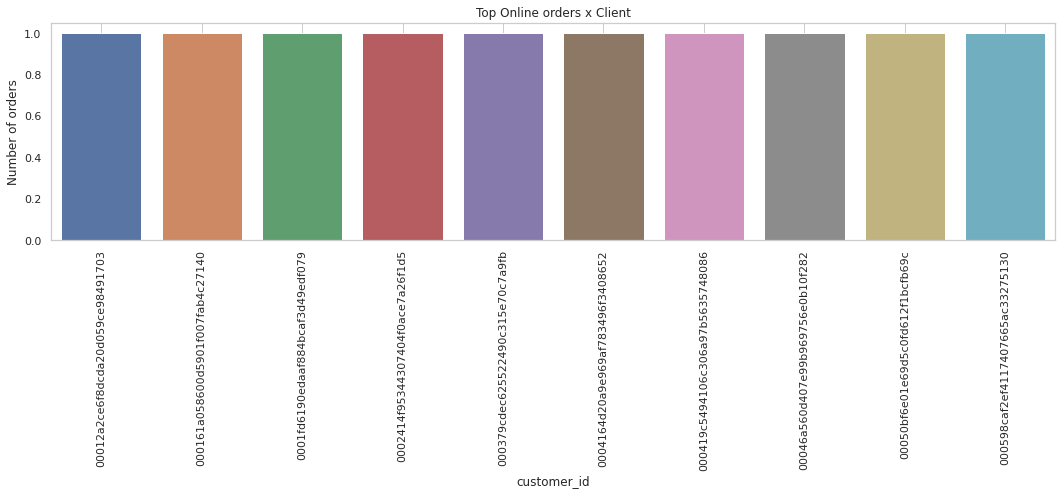

In [124]:
plt.figure(figsize=(18, 4))
aux=client_payments.groupby('customer_id').size().to_frame().rename(columns={0:'Number of orders'}).head(10).reset_index()
ax=sns.barplot(x='customer_id',y='Number of orders',data=aux);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title('Top Online orders x Client')
ax.grid()

In [133]:
client_pay_group

,customer_id,payment_value
,,sum
0,00012a2ce6f8dcda20d059ce98491703,114.74
1,000161a058600d5901f007fab4c27140,67.41
2,0001fd6190edaaf884bcaf3d49edf079,195.42
3,0002414f95344307404f0ace7a26f1d5,179.35
4,000379cdec625522490c315e70c7a9fb,107.01
...,...,...
98201,fffcb937e9dd47a13f05ecb8290f4d3e,91.91
98202,fffecc9f79fd8c764f843e9951b11341,81.36
98203,fffeda5b6d849fbd39689bb92087f431,63.13


In [154]:
client_product=pd.merge(client_product, customer)

In [155]:
client_product.columns


Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'HOUR', 'WEEK_DAY'],
      dtype='object')

In [137]:
client_product.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,HOUR,WEEK_DAY
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,1,credit_card,2,146.87,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,15,1
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,1,credit_card,8,335.48,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,20,4
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,1,credit_card,7,157.73,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,16,5
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,1,credit_card,1,173.30,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,16,1
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,1,credit_card,8,252.25,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,9,6


In [139]:
# df=client_product.loc[:, ['order_id', 'customer_id','customer_unique_id','customer_state','customer_city', 'product_id', 'product_category_name','payment_value','freight_value','price','order_purchase_timestamp']]


In [156]:
df1=client_product.sort_values(['payment_value'],ascending=False).head(40)
df1

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,HOUR,WEEK_DAY
6412,1617b1357756262bfa56ab541c47bc16,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,RJ,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23 00:00:00,15,4
101536,ec5b2ba62e574342386871631fafd3fc,763c8b1c9c68a0229c42c9fc6f662b93,29102,vila velha,ES,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,delivered,2018-07-15 14:49:44,2018-07-17 04:31:36,2018-07-20 13:09:00,2018-07-26 22:03:06,2018-08-02 00:00:00,14,6
13889,c6e2731c5b391845f6800c97401a43a9,dc4802a71eae9be1dd28f5d788ceb526,79042,campo grande,MS,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,delivered,2017-02-12 20:37:36,2017-02-12 20:45:12,2017-02-16 09:23:13,2017-03-03 14:23:18,2017-03-09 00:00:00,20,6
21864,f48d464a0baaea338cb25f816991ab1f,459bef486812aa25204be022145caa62,29066,vitoria,ES,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,delivered,2018-07-25 18:10:17,2018-07-27 04:05:13,2018-08-03 14:42:00,2018-08-15 14:57:50,2018-08-10 00:00:00,18,2
4042,3fd6777bbce08a352fddd04e4a7cc8f6,ff4159b92c40ebe40454e3e6a7c35ed6,17506,marilia,SP,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,delivered,2017-05-24 18:14:34,2017-05-26 02:45:17,2017-05-26 11:20:47,2017-06-05 17:09:48,2017-06-28 00:00:00,18,2
89124,05455dfa7cd02f13d132aa7a6a9729c6,4007669dec559734d6f53e029e360987,35501,divinopolis,MG,2cc9089445046817a7539d90805e6e5a,1,boleto,1,6081.54,delivered,2017-11-24 11:03:35,2017-11-28 12:55:46,2017-12-06 11:52:14,2017-12-13 12:16:02,2017-12-22 00:00:00,11,4
28240,df55c14d1476a9a3467f131269c2477f,da122df9eeddfedc1dc1f5349a1a690c,28970,araruama,RJ,a96610ab360d42a2e5335a3998b4718a,1,credit_card,10,4950.34,delivered,2017-04-01 15:58:40,2017-04-03 13:25:18,2017-04-11 15:10:34,2017-04-17 11:04:45,2017-05-02 00:00:00,15,5
12440,24bbf5fd2f2e1b359ee7de94defc4a15,eebb5dda148d3893cdaf5b5ca3040ccb,9341,maua,SP,199af31afc78c699f0dbf71fb178d4d4,1,credit_card,8,4764.34,delivered,2017-04-18 18:50:13,2017-04-19 15:50:15,2017-04-25 13:39:59,2017-05-07 10:42:39,2017-05-15 00:00:00,18,1
42024,3d979689f636322c62418b6346b1c6d2,48e1ac109decbb87765a3eade6854098,58038,joao pessoa,PB,8dbc85d1447242f3b127dda390d56e19,1,credit_card,8,4681.78,delivered,2018-06-22 12:23:19,2018-06-22 12:36:36,2018-06-22 13:00:00,2018-07-06 01:08:30,2018-07-17 00:00:00,12,4
66580,1afc82cd60e303ef09b4ef9837c9505c,edde2314c6c30e864a128ac95d6b2112,2995,sao paulo,SP,426a9742b533fc6fed17d1fd6d143d7e,1,credit_card,10,4513.32,delivered,2018-08-03 21:10:16,2018-08-06 14:24:28,2018-08-06 15:01:00,2018-08-08 22:51:57,2018-08-20 00:00:00,21,4


In [157]:
df1.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'HOUR', 'WEEK_DAY'],
      dtype='object')

<AxesSubplot:xlabel='customer_id'>

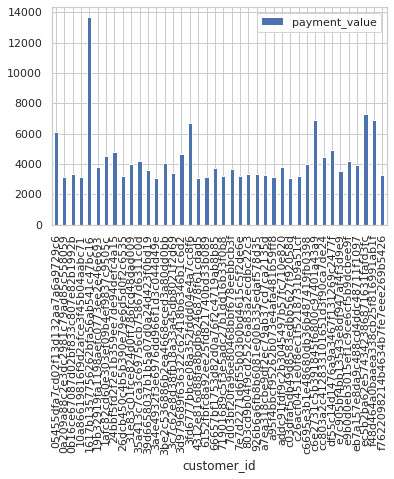

In [152]:
df1.groupby('customer_id').agg({'payment_value':'sum'}).plot(kind='bar') 

In [159]:
type_loc_product = pd.crosstab(df["product_category_name"], df["customer_state"])
type_loc_product 

NameError: name 'df' is not defined